In [1]:
import tensorflow as tf 
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
BS= 8

In [4]:
train_datagen =ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,validation_split=0.2)

In [5]:
train_data=train_datagen.flow_from_directory(r'C:\Users\HP\Driver Drowsiness Detection\Prepared_data\train',
                                            target_size = (80,80),batch_size=BS,class_mode='categorical',subset ='training')
validation_data =train_datagen.flow_from_directory(r'C:\Users\HP\Driver Drowsiness Detection\Prepared_data\train',
                                            target_size = (80,80),batch_size=BS,class_mode='categorical',subset='validation')

Found 63930 images belonging to 2 classes.
Found 15982 images belonging to 2 classes.


In [6]:
test_datagen =ImageDataGenerator(rescale=1./255)

test_data=test_datagen.flow_from_directory(r'C:\Users\HP\Driver Drowsiness Detection\Prepared_data\test',
                                            target_size = (80,80),batch_size=BS,class_mode='categorical')

Found 4986 images belonging to 2 classes.


In [7]:
bmodel = InceptionV3(include_top=False,weights='imagenet',input_tensor=Input(shape=(80,80,3),batch_size=BS))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64,activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation ='softmax')(hmodel)

model = Model(inputs=bmodel.input,outputs=hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 

In [9]:
checkpoint = ModelCheckpoint(r'C:\Users\HP\Driver Drowsiness Detection\models\model.h5',
                           monitor='val_loss',save_best_only =True,verbose=3)
earlystop = EarlyStopping(monitor ='val_loss',patience=7,verbose=3,restore_best_weights=True)
learning_rate = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=3)
callbacks=[checkpoint,earlystop,learning_rate]

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//BS,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//BS,
                   callbacks=callbacks,epochs=50)

C:\Users\HP\AppData\Local\Temp\ipykernel_23068\1440000149.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//BS,


Epoch 1/50
7991/7991 [==============================] - ETA: 0s - loss: 0.2081 - accuracy: 0.9185
Epoch 1: val_loss improved from inf to 0.18533, saving model to C:\Users\HP\Driver Drowsiness Detection\models\model.h5


C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7991/7991 [==============================] - 433s 53ms/step - loss: 0.2081 - accuracy: 0.9185 - val_loss: 0.1853 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 2/50
7990/7991 [============================>.] - ETA: 0s - loss: 0.1791 - accuracy: 0.9306
Epoch 2: val_loss improved from 0.18533 to 0.18119, saving model to C:\Users\HP\Driver Drowsiness Detection\models\model.h5
7991/7991 [==============================] - 1391s 174ms/step - loss: 0.1791 - accuracy: 0.9306 - val_loss: 0.1812 - val_accuracy: 0.9262 - lr: 0.0010
Epoch 3/50
7991/7991 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.9350
Epoch 3: val_loss did not improve from 0.18119
7991/7991 [==============================] - 477s 60ms/step - loss: 0.1692 - accuracy: 0.9350 - val_loss: 0.1905 - val_accuracy: 0.9179 - lr: 0.0010
Epoch 4/50
7991/7991 [==============================] - ETA: 0s - loss: 0.1651 - accuracy: 0.9383
Epoch 4: val_loss did not improve from 0.18119
7991/7991 [============================

In [11]:
model.save(r'C:\Users\HP\Driver Drowsiness Detection\models')

INFO:tensorflow:Assets written to: C:\Users\HP\Driver Drowsiness Detection\models\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Driver Drowsiness Detection\models\assets


In [12]:
import matplotlib.pyplot as plt

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
learning_rate =history.history['lr']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

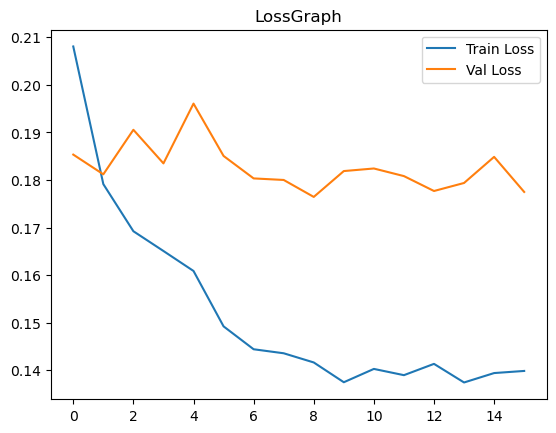

In [14]:
plt.plot(train_loss, label ="Train Loss")
plt.plot(val_loss, label ="Val Loss")
plt.legend()
plt.title("LossGraph")
plt.show()

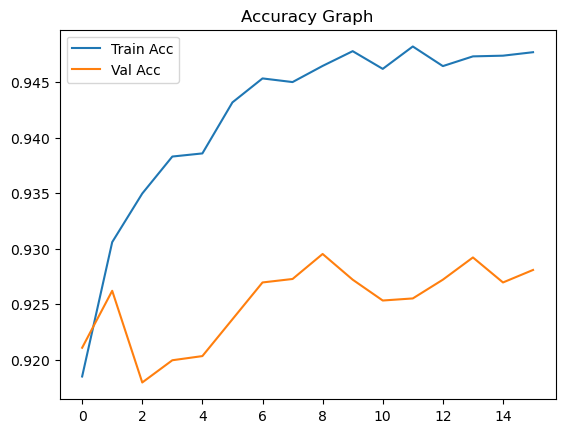

In [15]:
plt.plot(train_acc, label ="Train Acc")
plt.plot(val_acc, label ="Val Acc")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

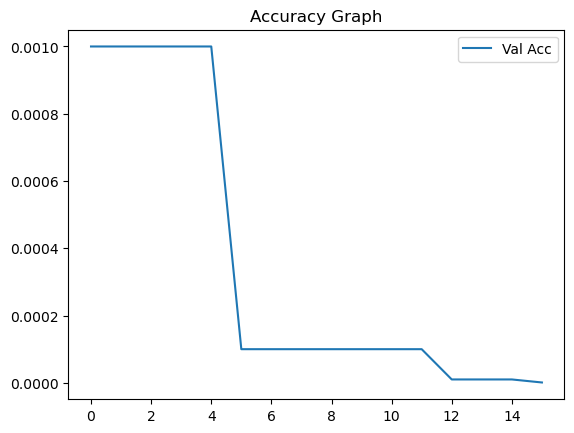

In [16]:
plt.plot(learning_rate, label ="Val Acc")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(8, 80, 80, 3)]             0         []                            
                                                                                                  
 conv2d (Conv2D)             (8, 39, 39, 32)              864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (8, 39, 39, 32)              96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (8, 39, 39, 32)              0         ['batch_normalization[0][0